In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


ImportError: No module named tensorflow

In [3]:

X, y = make_circles(n_samples=1000, factor=0.4)
print X.shape, y.shape

(1000L, 2L) (1000L,)


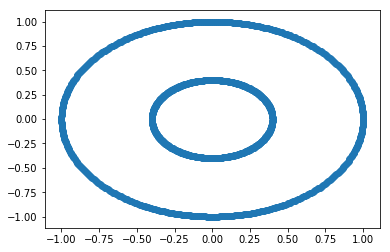

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


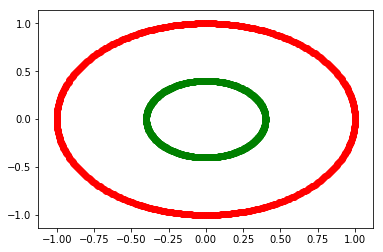

In [5]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')

plt.show()

In [6]:

Y = np_utils.to_categorical(y)
print Y.shape

for ix in range(10):
    print Y[ix], "---", y[ix]

NameError: name 'np_utils' is not defined

In [7]:

split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print X_train.shape

NameError: name 'Y' is not defined